<a href="https://colab.research.google.com/github/Janahmedtawfik/Janahmedtawfik/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.isnull().sum()/len(titanic)*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [7]:
titanic = titanic.drop('Cabin', axis=1)

In [8]:
titanic = titanic.dropna(subset=['Embarked'])

In [9]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [10]:
titanic.isnull().sum()/len(titanic)*100

,0
PassengerId,0.0
Survived,0.0
Pclass,0.0
Name,0.0
Sex,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Ticket,0.0
Fare,0.0


In [11]:
for column in titanic.select_dtypes(include = 'number').columns:
  q1 = titanic[column].quantile(0.25)
  q3 = titanic[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  for index in titanic[titanic[column] < lower_bound].index: ##############
    titanic.at[index, column] = lower_bound

  for index in titanic[titanic[column] > upper_bound].index:
    titanic.at[index, column] = upper_bound


In [12]:
titanic['Survived'].value_counts()

,count
Survived,
0,549
1,340


<Axes: xlabel='Sex', ylabel='count'>

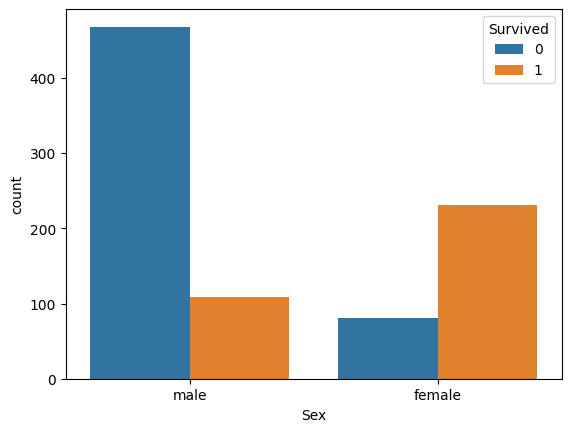

In [13]:
sns.countplot(x='Sex', hue='Survived', data=titanic)

<Axes: xlabel='Pclass', ylabel='count'>

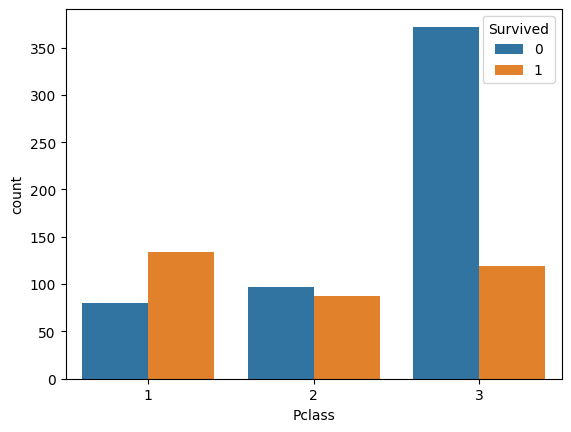

In [14]:
sns.countplot(x='Pclass', hue='Survived', data=titanic)

In [15]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,65.6563,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,S


In [16]:
titanic.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [17]:
x = titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y = titanic['Survived']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [19]:
model = LogisticRegression()

In [20]:
model.fit(x_train, y_train)
y_pred= model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print("accuracy score:",accuracy)

accuracy score: 0.7960618846694796


In [24]:
pclass = int(input("Enter Pclass (1, 2, or 3): "))
sex = int(input("Enter Sex (1 for Male, 0 for Female): "))
age = float(input("Enter Age: "))
sibsp = int(input("Enter SibSp: "))
parch = int(input("Enter Parch: "))
fare = float(input("Enter Fare: "))
embarked = int(input("Enter Embarked (0 for S, 1 for C, 2 for Q): "))
user_input = np.array([[pclass, sex, age, sibsp, parch, fare, embarked]])
input_reshaped = user_input.reshape(1,-1)
prediction = model.predict(input_reshaped)
if prediction[0] == 0:
  print("Not Survived")
else:
  print("Survived")

Enter Pclass (1, 2, or 3): 2
Enter Sex (1 for Male, 0 for Female): 1
Enter Age: 20
Enter SibSp: 1
Enter Parch: 0
Enter Fare: 0
Enter Embarked (0 for S, 1 for C, 2 for Q): 1
Survived
